In [2]:
import json
import csv
import pandas as pd
import sqlite3
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import seaborn as sns
import statsmodels.formula.api as sm
import math

In [3]:
ls

GM_buy_sell_diff.ipynb              GM_trade_size_by_account.ipynb
GM_tail_distribution.ipynb          GM_transaction_price_benford.ipynb
GM_trade_price_clustering.ipynb     nft_database_research.db


In [4]:
conn = sqlite3.connect('nft_database_research.db')
c = conn.cursor()

In [9]:
full_df = pd.read_sql_query("SELECT * from combined", conn)

In [6]:
full_df.head()

,block_number,block_timestamp,transaction_hash,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,date,name,tokenCount,onSaleCount,rank_allTime,volume_allTime,ETH-USD,price,GAS-USD
0,15669425,2022-10-03T18:30:59.000Z,0xa4b20310f320343a55e91e9e8d5884a9d402424a1099...,0.0,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210030130,0x744a1ee51766d9d30229a46b62ef84a8a481470f,0x95933de7546f9dfad542860355cfe2fae1e5e843,1,03-Oct-22-06:30:59 PM,CryptoSpells,1047,5,2767,237.59036,1323.439209,0.0,2.268938
1,15661059,2022-10-02T14:28:11.000Z,0x011ec97fe3af952b9d0e2985b25e0e336c14cf63614a...,0.0,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210020208,0x5df4660295bed7abc783480c7d28d8c015cfb37a,0x95933de7546f9dfad542860355cfe2fae1e5e843,1,02-Oct-22-02:28:11 PM,CryptoSpells,1047,5,2767,237.59036,1276.093506,0.0,2.239082
2,15521784,2022-09-12T16:10:00.000Z,0x099a149c51eecbe9e160c45c8ba011cf0138f401ded5...,0.0,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210020209,0x5df4660295bed7abc783480c7d28d8c015cfb37a,0x95933de7546f9dfad542860355cfe2fae1e5e843,1,12-Sep-22-04:10:00 PM,CryptoSpells,1047,5,2767,237.59036,1713.765259,0.0,2.523954
3,15521128,2022-09-12T13:35:34.000Z,0x8945a05c09434a07073087b4e2ec6c0fa3375e579476...,0.0,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210020210,0x5df4660295bed7abc783480c7d28d8c015cfb37a,0x95933de7546f9dfad542860355cfe2fae1e5e843,1,12-Sep-22-01:35:34 PM,CryptoSpells,1047,5,2767,237.59036,1713.765259,0.0,2.523954
4,15518827,2022-09-12T04:13:22.000Z,0x10c86d7d001cee6bb21946f1c7efaa1a72fbe9fc4b54...,0.0,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210040100,0x5df4660295bed7abc783480c7d28d8c015cfb37a,0xbcdc510d5f4976559a49f38a7db81c4fabb0030c,1,12-Sep-22-04:13:22 AM,CryptoSpells,1047,5,2767,237.59036,1713.765259,0.0,2.523954


In [7]:
print("num transactions:", full_df.shape[0])

num transactions: 1137198


In [39]:
non_zero_price_df = full_df.loc[full_df['price'] != 0]
non_zero_price_df

,block_number,block_timestamp,transaction_hash,value,contract_type,transaction_type,token_address,token_id,from_address,to_address,amount,date,name,tokenCount,onSaleCount,rank_allTime,volume_allTime,ETH-USD,price,GAS-USD
7,15477159,2022-09-05T09:55:02.000Z,0x27b73ca9458920d1deb265899b207bf614cab1d4e1cb...,0.29,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210010116,0x3d41199226f984505d7be029057c23be4a44795e,0xbcdc510d5f4976559a49f38a7db81c4fabb0030c,1,05-Sep-22-09:55:02 AM,CryptoSpells,1047,5,2767,237.59036,1617.183228,468.983136,2.431822
8,15434097,2022-08-29T12:29:52.000Z,0x260fe04bddc017e4d834969fe87e45d4a0f6d1b6b523...,0.11,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210010117,0x543154e6914d93a137b0749d2e6432a4d597df49,0x0df3919c74d2dbb5fda7ec0cd9cfc7e987240496,1,29-Aug-22-12:29:52 PM,CryptoSpells,1047,5,2767,237.59036,1553.037354,170.834109,2.483247
9,15434094,2022-08-29T12:28:20.000Z,0x086778bbca0c9de64b4f1f35747c0bb06a80f352bca8...,0.11,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210010066,0x543154e6914d93a137b0749d2e6432a4d597df49,0x0df3919c74d2dbb5fda7ec0cd9cfc7e987240496,1,29-Aug-22-12:28:20 PM,CryptoSpells,1047,5,2767,237.59036,1553.037354,170.834109,2.483247
10,15434091,2022-08-29T12:27:41.000Z,0xe3598b352d7d78e28e485badf8f517fd0ddda96e81ac...,0.11,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210010055,0x543154e6914d93a137b0749d2e6432a4d597df49,0x0df3919c74d2dbb5fda7ec0cd9cfc7e987240496,1,29-Aug-22-12:27:41 PM,CryptoSpells,1047,5,2767,237.59036,1553.037354,170.834109,2.483247
11,15434087,2022-08-29T12:26:53.000Z,0xa53f708743cca220a23cdc42e35c4df3cc471e569efa...,0.11,ERC721,Single,0xa8abf045fe1a9ef0583e436393a6e4e0b483f717,210020311,0x543154e6914d93a137b0749d2e6432a4d597df49,0x0df3919c74d2dbb5fda7ec0cd9cfc7e987240496,1,29-Aug-22-12:26:53 PM,CryptoSpells,1047,5,2767,237.59036,1553.037354,170.834109,2.483247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137191,13455028,2021-10-20T14:00:24.000Z,0x9f10d3fdabcfbb45f11ccbf8d44b8c3a33439cee58a5...,0.15,ERC721,Single,0xce82d65314502ce39472a2442d4a2cbc4cb9f293,7,0x0000000000000000000000000000000000000000,0xc37e705f34801896121b2da24327332cb7dc2ca7,1,20-Oct-21-02:00:24 PM,Animal Society,7777,63,2544,279.71360,4155.992188,623.398828,9.045222
1137192,13455028,2021-10-20T14:00:24.000Z,0x79f7d289edbc39cd293bed660a0b664bb848f361dd2e...,0.15,ERC721,Single,0xce82d65314502ce39472a2442d4a2cbc4cb9f293,6,0x0000000000000000000000000000000000000000,0x351c0381d2a6a97d9c7c5090ea5451c83c06b6de,1,20-Oct-21-02:00:24 PM,Animal Society,7777,63,2544,279.71360,4155.992188,623.398828,9.045222
1137193,13455028,2021-10-20T14:00:24.000Z,0x79f7d289edbc39cd293bed660a0b664bb848f361dd2e...,0.15,ERC721,Single,0xce82d65314502ce39472a2442d4a2cbc4cb9f293,5,0x0000000000000000000000000000000000000000,0x351c0381d2a6a97d9c7c5090ea5451c83c06b6de,1,20-Oct-21-02:00:24 PM,Animal Society,7777,63,2544,279.71360,4155.992188,623.398828,9.045222
1137194,13455028,2021-10-20T14:00:24.000Z,0x79f7d289edbc39cd293bed660a0b664bb848f361dd2e...,0.15,ERC721,Single,0xce82d65314502ce39472a2442d4a2cbc4cb9f293,4,0x0000000000000000000000000000000000000000,0x351c0381d2a6a97d9c7c5090ea5451c83c06b6de,1,20-Oct-21-02:00:24 PM,Animal Society,7777,63,2544,279.71360,4155.992188,623.398828,9.045222


In [40]:
full_price = non_zero_price_df[("price")]
full_price = full_price.to_frame()
full_price.reset_index()
full_price

,price
7,468.983136
8,170.834109
9,170.834109
10,170.834109
11,170.834109
...,...
1137191,623.398828
1137192,623.398828
1137193,623.398828
1137194,623.398828


In [41]:
len(full_price)

697486

About half of all transactions have a price. We now want to take the first digit of all these price. First, we multiply prices by 10000 to make all first significant digit before the decimal.

In [64]:
full_price['multiplied_price'] = full_price['price'] * 10000000000000000
full_price

,price,multiplied_price,first_digit
7,468.983136,4.689831e+18,4
8,170.834109,1.708341e+18,1
9,170.834109,1.708341e+18,1
10,170.834109,1.708341e+18,1
11,170.834109,1.708341e+18,1
...,...,...,...
1137191,623.398828,6.233988e+18,6
1137192,623.398828,6.233988e+18,6
1137193,623.398828,6.233988e+18,6
1137194,623.398828,6.233988e+18,6


In [65]:
full_price['first_digit'] = full_price['multiplied_price'].astype(str).str[0].astype(int)
full_price

,price,multiplied_price,first_digit
7,468.983136,4.689831e+18,4
8,170.834109,1.708341e+18,1
9,170.834109,1.708341e+18,1
10,170.834109,1.708341e+18,1
11,170.834109,1.708341e+18,1
...,...,...,...
1137191,623.398828,6.233988e+18,6
1137192,623.398828,6.233988e+18,6
1137193,623.398828,6.233988e+18,6
1137194,623.398828,6.233988e+18,6


In [66]:
full_price[full_price['first_digit'] == 0].sort_values(by=['price'], ascending=True)

,price,multiplied_price,first_digit


In [67]:
price_group_df = full_price.groupby(by=['first_digit']).count()
price_group_df

,price,multiplied_price
first_digit,,
1,180230,180230
2,137771,137771
3,112072,112072
4,78573,78573
5,49661,49661
6,57398,57398
7,28263,28263
8,26385,26385
9,27133,27133


In [68]:
price_group_df.columns

Index(['price', 'multiplied_price'], dtype='object')

In [72]:
price_group_df['percentage'] = price_group_df['price'] / price_group_df['price'].sum()
price_group_df

,price,multiplied_price,percentage
first_digit,,,
1,180230,180230,0.258399
2,137771,137771,0.197525
3,112072,112072,0.160680
4,78573,78573,0.112652
5,49661,49661,0.071200
6,57398,57398,0.082293
7,28263,28263,0.040521
8,26385,26385,0.037829
9,27133,27133,0.038901


In [79]:
price_group_df = price_group_df[['price', 'percentage']]
price_group_df = price_group_df.rename(columns={'price': 'count', 'percentage': 'percentage'})
price_group_df

,count,percentage
first_digit,,
1,180230,0.258399
2,137771,0.197525
3,112072,0.160680
4,78573,0.112652
5,49661,0.071200
6,57398,0.082293
7,28263,0.040521
8,26385,0.037829
9,27133,0.038901


In [91]:
price_group_df['digit'] = price_group_df.index
price_group_df['percentage'] = price_group_df['percentage'] * 100
price_group_df['standard'] = [30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]
price_group_df

,count,percentage,digit,standard
first_digit,,,,
1,180230,25.839945,1,30.1
2,137771,19.752511,2,17.6
3,112072,16.067993,3,12.5
4,78573,11.265172,4,9.7
5,49661,7.120000,5,7.9
6,57398,8.229269,6,6.7
7,28263,4.052124,7,5.8
8,26385,3.782872,8,5.1
9,27133,3.890114,9,4.6


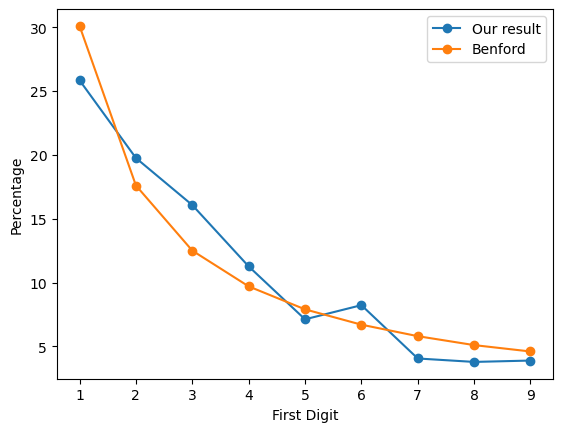

In [123]:
plt.plot(price_group_df['digit'], price_group_df['percentage'], marker='o', label='Our result')
plt.plot(price_group_df['digit'], price_group_df['standard'], marker='o', label='Benford')
plt.legend(loc="upper right")
plt.xlabel("First Digit")
plt.ylabel("Percentage")
plt.show()

Let's next perform a Chi-squared test. Our H0 is that the distribution of our dataset's first digit follows Benford's law; H1 is that it doesn't follow Benford's law. We perform a test to find out which one is more likely.

In [126]:
price_group_df['expected_count'] = price_group_df['standard'] * price_group_df['count'].sum() / 100
price_group_df

,count,percentage,digit,standard,expected_count
first_digit,,,,,
1,180230,25.839945,1,30.1,209943.286
2,137771,19.752511,2,17.6,122757.536
3,112072,16.067993,3,12.5,87185.750
4,78573,11.265172,4,9.7,67656.142
5,49661,7.120000,5,7.9,55101.394
6,57398,8.229269,6,6.7,46731.562
7,28263,4.052124,7,5.8,40454.188
8,26385,3.782872,8,5.1,35571.786
9,27133,3.890114,9,4.6,32084.356


In [127]:
benford_df = price_group_df.rename(columns={'count': 'observed_count', 'percentage': 'observed_perc', 'standard': 'expected_perc'})
benford_df

,observed_count,observed_perc,digit,expected_perc,expected_count
first_digit,,,,,
1,180230,25.839945,1,30.1,209943.286
2,137771,19.752511,2,17.6,122757.536
3,112072,16.067993,3,12.5,87185.750
4,78573,11.265172,4,9.7,67656.142
5,49661,7.120000,5,7.9,55101.394
6,57398,8.229269,6,6.7,46731.562
7,28263,4.052124,7,5.8,40454.188
8,26385,3.782872,8,5.1,35571.786
9,27133,3.890114,9,4.6,32084.356


In [129]:
import scipy.stats
def chi2_test(df,obs,exp,alpha,dof,ddof):
    statistic = round(scipy.stats.chisquare(df[obs], df[exp])[0], 2)
    critical_value = round(scipy.stats.chi2.ppf(1-alpha,dof-ddof), 2)
    if statistic > critical_value:
        return statistic, critical_value, "H0 to reject"
    else:
        return statistic, critical_value, "H0 to accept"

In [133]:
chi2_test(benford_df,'observed_count','expected_count',.05,len(benford_df),1)

(24688.9, 15.51, 'H0 to reject')

Therefore, the null hypothesis can be rejected.